In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import os

work_dir = os.path.join("run", "baseline", "basic") # change this to another folder name.
log_dir = os.path.join(work_dir, "log")

bilstm_log_file = "training_validation_log.arch_bilstm.csv"
bigru_log_file = "training_validation_log.arch_bigru.csv"

bilstm_df = pd.read_csv(
    os.path.join(log_dir, bilstm_log_file)
)

bigru_df = pd.read_csv(
    os.path.join(log_dir, bigru_log_file)
)

default_figsize = (8, 5)

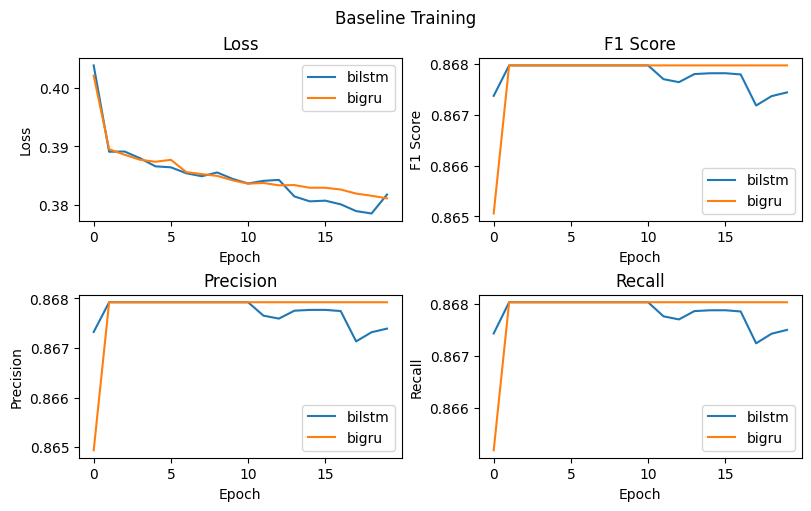

In [31]:
xs = [i for i in range(20)]
figs, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=default_figsize)

# loss
axes[0][0].plot(
    xs,
    bilstm_df["loss"].values,
    label="bilstm"
)
axes[0][0].plot(
    xs,
    bigru_df["loss"].values,
    label="bigru"
)
axes[0][0].set(xlabel="Epoch", ylabel="Loss", title="Loss")
axes[0][0].legend()

# f1 score
axes[0][1].plot(
    xs,
    bilstm_df["f1_score"].values,
    label="bilstm"
)
axes[0][1].plot(
    xs,
    bigru_df["f1_score"].values,
    label="bigru"
)
axes[0][1].set(xlabel="Epoch", ylabel="F1 Score", title="F1 Score")
axes[0][1].legend()

# precision
axes[1][0].plot(
    xs,
    bilstm_df["precision"].values,
    label="bilstm"
)
axes[1][0].plot(
    xs,
    bigru_df["precision"].values,
    label="bigru"
)
axes[1][0].set(xlabel="Epoch", ylabel="Precision", title="Precision")
axes[1][0].legend()

# recall
axes[1][1].plot(
    xs,
    bilstm_df["recall"].values,
    label="bilstm"
)
axes[1][1].plot(
    xs,
    bigru_df["recall"].values,
    label="bigru"
)
axes[1][1].set(xlabel="Epoch", ylabel="Recall", title="Recall")
axes[1][1].legend()


plt.suptitle("Baseline Training")
plt.show()

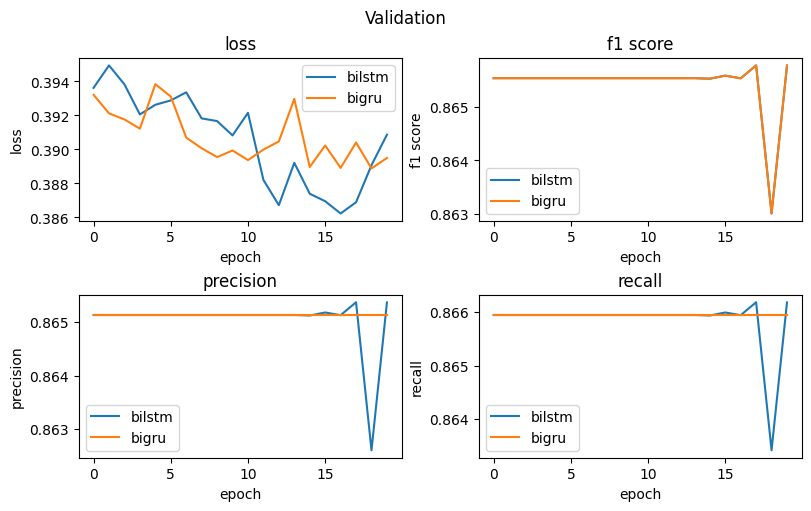

In [32]:
xs = [i for i in range(20)]
figs, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=default_figsize)

# loss
axes[0][0].plot(
    xs,
    bilstm_df["val_loss"].values,
    label="bilstm"
)
axes[0][0].plot(
    xs,
    bigru_df["val_loss"].values,
    label="BiGRU"
)
axes[0][0].set(xlabel="Epoch", ylabel="Loss", title="Loss")
axes[0][0].legend()

# f1 score
axes[0][1].plot(
    xs,
    bilstm_df["val_f1_score"].values,
    label="BiLSTM"
)
axes[0][1].plot(
    xs,
    bigru_df["val_f1_score"].values,
    label="BiGRU"
)
axes[0][1].set(xlabel="Epoch", ylabel="F1 Score", title="F1 Score")
axes[0][1].legend()

# precision
axes[1][0].plot(
    xs,
    bilstm_df["val_precision"].values,
    label="BiLSTM"
)
axes[1][0].plot(
    xs,
    bigru_df["val_precision"].values,
    label="BiGRU"
)
axes[1][0].set(xlabel="Epoch", ylabel="Precision", title="Precision")
axes[1][0].legend()

# recall
axes[1][1].plot(
    xs,
    bilstm_df["val_recall"].values,
    label="BiLSTM"
)
axes[1][1].plot(
    xs,
    bigru_df["val_recall"].values,
    label="BiGRU"
)
axes[1][1].set(xlabel="Epoch", ylabel="Recall", title="Recall")
axes[1][1].legend()


plt.suptitle("Validation")
plt.show()

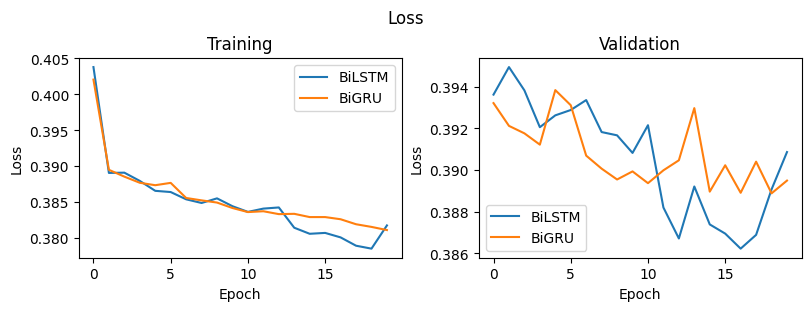

In [36]:
xs = [i for i in range(20)]
figs, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(8, 3))

# train f1 score
axes[0].plot(
    xs,
    bilstm_df["loss"].values,
    label="BiLSTM"
)
axes[0].plot(
    xs,
    bigru_df["loss"].values,
    label="BiGRU"
)
axes[0].set(xlabel="Epoch", ylabel="Loss", title="Training")
axes[0].legend()

# f1 score
axes[1].plot(
    xs,
    bilstm_df["val_loss"].values,
    label="BiLSTM"
)
axes[1].plot(
    xs,
    bigru_df["val_loss"].values,
    label="BiGRU"
)
axes[1].set(xlabel="Epoch", ylabel="Loss", title="Validation")
axes[1].legend()

plt.suptitle("Loss")
plt.show()

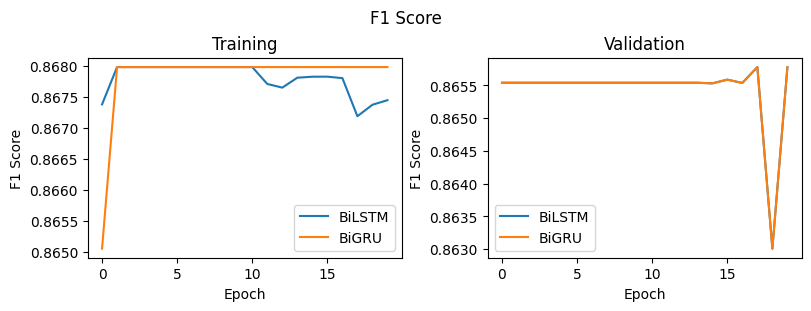

In [35]:
xs = [i for i in range(20)]
figs, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(8, 3))

# train f1 score
axes[0].plot(
    xs,
    bilstm_df["f1_score"].values,
    label="BiLSTM"
)
axes[0].plot(
    xs,
    bigru_df["f1_score"].values,
    label="BiGRU"
)
axes[0].set(xlabel="Epoch", ylabel="F1 Score", title="Training")
axes[0].legend()

# f1 score
axes[1].plot(
    xs,
    bilstm_df["val_f1_score"].values,
    label="BiLSTM"
)
axes[1].plot(
    xs,
    bigru_df["val_f1_score"].values,
    label="BiGRU"
)
axes[1].set(xlabel="Epoch", ylabel="F1 Score", title="Validation")
axes[1].legend()

plt.suptitle("F1 Score")
plt.show()